In [2]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.constants as const
import pandas as pd
import cmcrameri as cmcm
from matplotlib import rcParams
rcParams['text.usetex'] = True
rcParams['text.latex.preamble'] = r'\usepackage[T1]{fontenc} \usepackage{amsmath} \usepackage{color}'
rcParams['font.family'] = 'serif'
rcParams['axes.linewidth'] = 2
rcParams['xtick.major.width'] = 1.2
rcParams['xtick.major.size'] = 10
rcParams['xtick.minor.width'] = 1.2
rcParams['xtick.minor.size'] = 6
rcParams['ytick.major.width'] = 1.2
rcParams['ytick.major.size'] = 8
rcParams['ytick.minor.width'] = 1.2
rcParams['ytick.minor.size'] = 6 

In [3]:
df = pd.read_excel("../../save/eis_line_list_final_v2.xlsx",sheet_name="awsom_compare")
df["ion"] = df["ion"].str.strip()
df["charge_stat"] = df["charge_stat"].str.strip()
df["quality"] = df["quality"].str.strip()
df["fwhm_true_err"] = df["fwhm_fit"]/df["fwhm_true"]*df["fwhm_err"]
df["Z/A"] = df["Z"]/df["A"]
df = df.sort_values(["Z/A","wvl_chianti"])
df = df.reset_index(drop=True)
df

,ion,charge_stat,Z,A,temp,wvl_fit,wvl_chianti,fwhm_fit,fwhm_err,fwhm_true,fwhm_awsom_fit,fwhm_awsom_err,fwhm_awsom_true,quality,desc,fwhm_true_cross,fwhm_true_err,Z/A
0,Fe,viii,7,55.8500,5.8,185.209,185.213,0.07648,0.00044,0.0314,NaN,NaN,0.039858,a,NaN,0.042996,0.001072,0.125336
1,Fe,viii,7,55.8500,5.8,186.600,186.598,0.07981,0.00072,0.0388,NaN,NaN,0.040446,a,NaN,0.048673,0.001481,0.125336
2,Fe,viii,7,55.8500,5.8,194.656,194.661,0.07716,0.00049,0.0331,NaN,NaN,0.048378,a,NaN,0.044194,0.001142,0.125336
3,Fe,viii,7,55.8500,5.8,253.947,253.956,0.07980,0.00280,0.0396,NaN,NaN,0.054402,a,Si X at blue wing,0.048657,0.005642,0.125336
4,Mn,viii,7,54.9380,5.8,185.449,185.463,0.08280,0.00390,0.0447,NaN,NaN,0.039677,b,bl with Fe VII,0.053435,0.007224,0.127416
5,Fe,ix,8,55.8500,5.8,189.933,189.935,0.07530,0.00060,0.0291,NaN,NaN,0.040286,a,NaN,0.040860,0.001553,0.143241
6,Fe,ix,8,55.8500,5.8,191.209,191.206,0.07710,0.00180,0.0331,NaN,NaN,0.041242,a,NaN,0.044089,0.004193,0.143241
7,Fe,ix,8,55.8500,5.8,197.856,197.854,0.08085,0.00035,0.0410,NaN,NaN,0.043069,a,NaN,0.050360,0.000690,0.143241
8,Fe,x,9,55.8500,5.9,174.521,174.531,0.07940,0.00150,0.0380,NaN,NaN,0.038511,a,NaN,0.047998,0.003134,0.161146
9,Fe,x,9,55.8500,5.9,177.230,177.240,0.08078,0.00064,0.0407,NaN,NaN,0.039047,a,NaN,0.050248,0.001270,0.161146


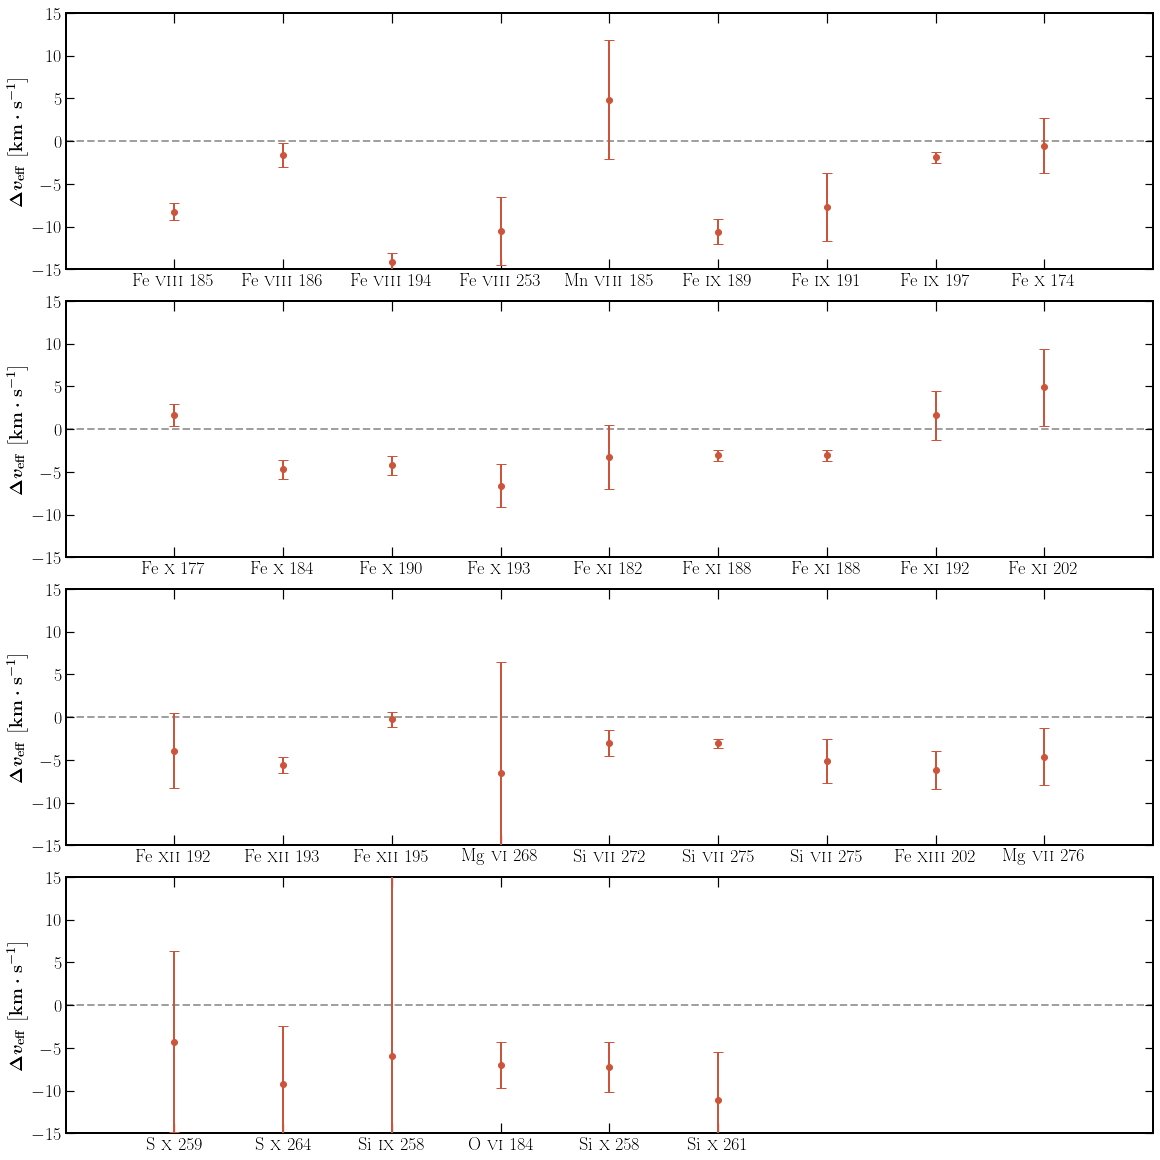

In [18]:
fig, axes = plt.subplots(4,1,figsize=(16,16),constrained_layout=True)

c = const.c.cgs/1.e5
n_line_window = 9

for ax_index, ax_ in enumerate(axes):
    df_plot = df.iloc[ax_index*n_line_window:(ax_index+1)*n_line_window]
    df_plot = df_plot.reset_index(drop=True)
    plot_x = np.arange(df_plot.index[-1]+1) 
    line_name = df_plot["ion"] + r" \textsc{"+ df_plot["charge_stat"] + r"} " + \
         ((df_plot["wvl_chianti"].values).astype("int")).astype("str")
    eis_veff = df_plot["fwhm_true"]/df_plot["wvl_chianti"]*c/np.sqrt(4*np.log(2))

    awsom_veff = df_plot["fwhm_awsom_true"]/df_plot["wvl_chianti"]*c/np.sqrt(4*np.log(2))

    eis_veff_err = df_plot["fwhm_err"]*df_plot["fwhm_fit"] \
                    /df_plot["fwhm_true"]/df_plot["wvl_chianti"]*c/np.sqrt(4*np.log(2))

    eis_veff_cross = df_plot["fwhm_true_cross"]/df_plot["wvl_chianti"]*c/np.sqrt(4*np.log(2))
    eis_veff_err_cross = df_plot["fwhm_err"]*df_plot["fwhm_fit"] \
                    /df_plot["fwhm_true_cross"]/df_plot["wvl_chianti"]*c/np.sqrt(4*np.log(2))

    # for line_index, line_ in df_plot.iterrows():
    ax_.errorbar(plot_x,eis_veff-awsom_veff,eis_veff_err,color="#CC543A",ls="none",marker="o",
            markersize=6,capsize=5,lw=2,label="EIS",zorder=15)

    # ax_.errorbar(plot_x,eis_veff_cross-awsom_veff,eis_veff_err_cross,color="#0089A7",ls="none",marker="o",
    #         markersize=6,capsize=5,lw=2,label="EIS cross",zorder=15)
    
    ax_.set_xticks(plot_x)
    ax_.set_xticklabels(line_name)
    ax_.set_xlim(left=-1,right=n_line_window)
    ax_.set_ylim((-15,15))
    ax_.axhline(0,color="#787878",lw=2,ls="--",alpha=0.7,zorder=0)
    ax_.tick_params(labelsize=18,direction="in",which="both",right=True,top=True)
    ax_.set_ylabel(r"$\boldsymbol{\Delta v_{\rm eff}\ \mathrm{\left[km\cdot s^{-1}\right]}}$",fontsize=18)

# axes[0].legend(loc="upper left",fontsize=18,frameon=False)
    

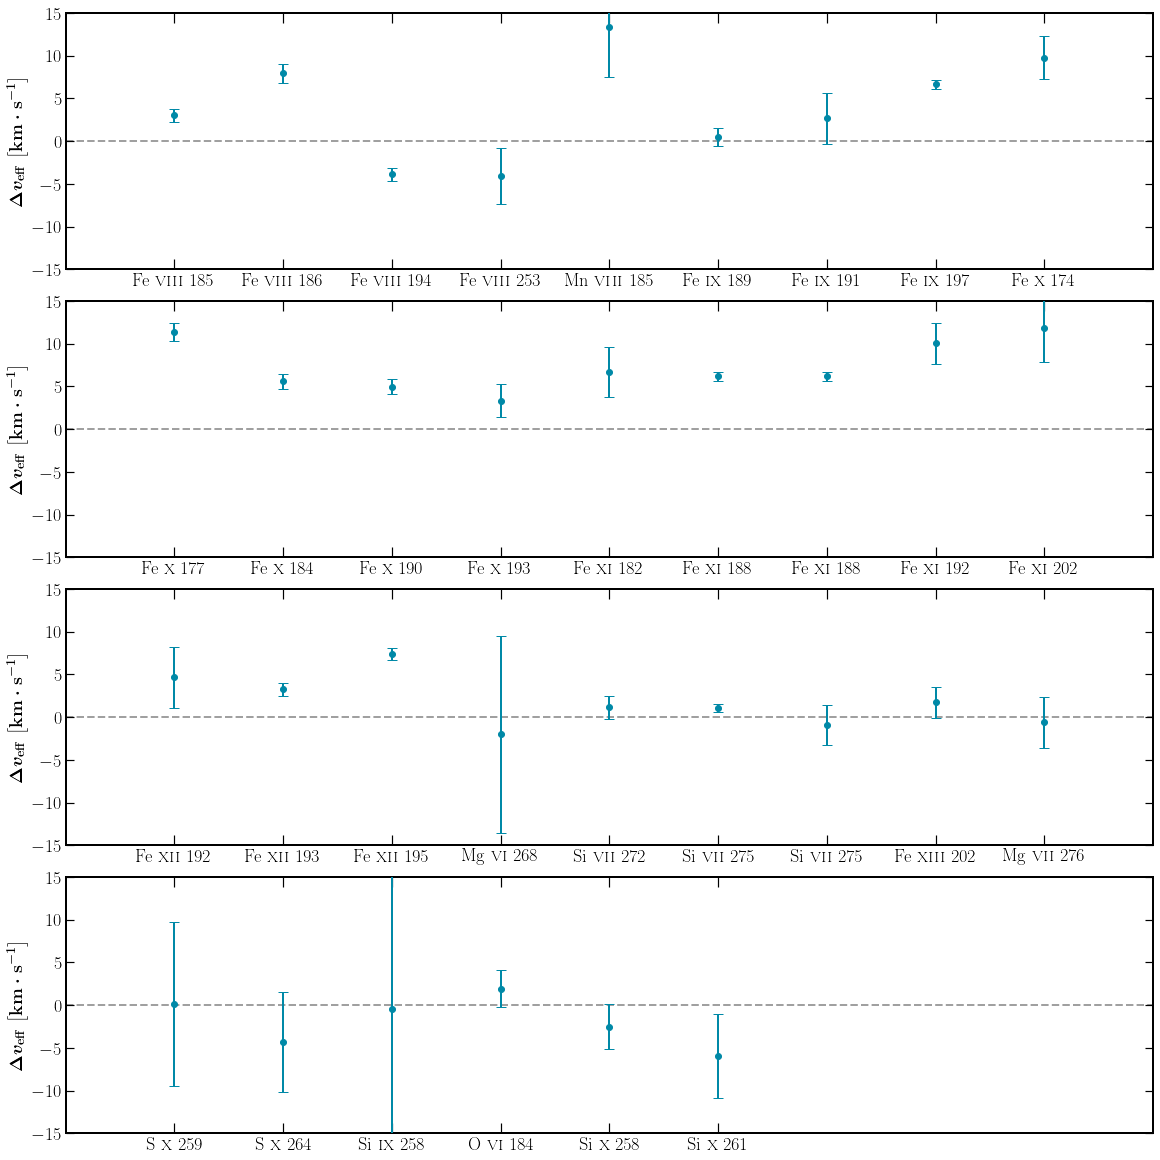

In [19]:
fig, axes = plt.subplots(4,1,figsize=(16,16),constrained_layout=True)

c = const.c.cgs/1.e5
n_line_window = 9

for ax_index, ax_ in enumerate(axes):
    df_plot = df.iloc[ax_index*n_line_window:(ax_index+1)*n_line_window]
    df_plot = df_plot.reset_index(drop=True)
    plot_x = np.arange(df_plot.index[-1]+1) 
    line_name = df_plot["ion"] + r" \textsc{"+ df_plot["charge_stat"] + r"} " + \
         ((df_plot["wvl_chianti"].values).astype("int")).astype("str")
    eis_veff = df_plot["fwhm_true"]/df_plot["wvl_chianti"]*c/np.sqrt(4*np.log(2))

    awsom_veff = df_plot["fwhm_awsom_true"]/df_plot["wvl_chianti"]*c/np.sqrt(4*np.log(2))

    eis_veff_err = df_plot["fwhm_err"]*df_plot["fwhm_fit"] \
                    /df_plot["fwhm_true"]/df_plot["wvl_chianti"]*c/np.sqrt(4*np.log(2))

    eis_veff_cross = df_plot["fwhm_true_cross"]/df_plot["wvl_chianti"]*c/np.sqrt(4*np.log(2))
    eis_veff_err_cross = df_plot["fwhm_err"]*df_plot["fwhm_fit"] \
                    /df_plot["fwhm_true_cross"]/df_plot["wvl_chianti"]*c/np.sqrt(4*np.log(2))

    # for line_index, line_ in df_plot.iterrows():
    # ax_.errorbar(plot_x,eis_veff-awsom_veff,eis_veff_err,color="#CC543A",ls="none",marker="o",
    #         markersize=6,capsize=5,lw=2,label="EIS",zorder=15)

    ax_.errorbar(plot_x,eis_veff_cross-awsom_veff,eis_veff_err_cross,color="#0089A7",ls="none",marker="o",
            markersize=6,capsize=5,lw=2,label="EIS cross",zorder=15)
    
    ax_.set_xticks(plot_x)
    ax_.set_xticklabels(line_name)
    ax_.set_xlim(left=-1,right=n_line_window)
    ax_.set_ylim((-15,15))
    ax_.axhline(0,color="#787878",lw=2,ls="--",alpha=0.7,zorder=0)
    ax_.tick_params(labelsize=18,direction="in",which="both",right=True,top=True)
    ax_.set_ylabel(r"$\boldsymbol{\Delta v_{\rm eff}\ \mathrm{\left[km\cdot s^{-1}\right]}}$",fontsize=18)

# axes[0].legend(loc="upper left",fontsize=18,frameon=False)
    

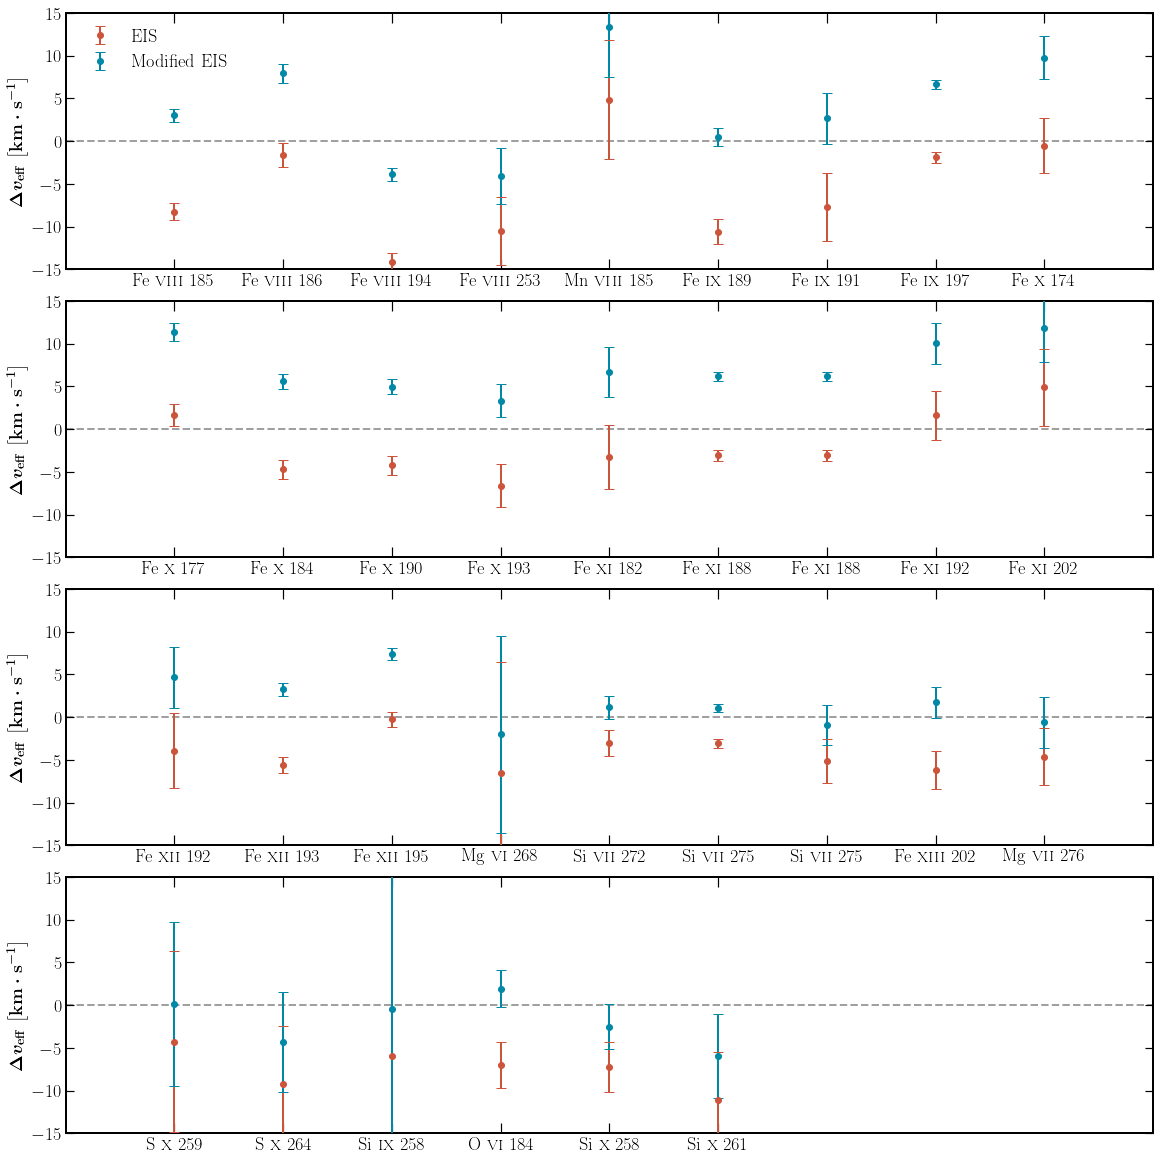

In [24]:
fig, axes = plt.subplots(4,1,figsize=(16,16),constrained_layout=True)

c = const.c.cgs/1.e5
n_line_window = 9

for ax_index, ax_ in enumerate(axes):
    df_plot = df.iloc[ax_index*n_line_window:(ax_index+1)*n_line_window]
    df_plot = df_plot.reset_index(drop=True)
    plot_x = np.arange(df_plot.index[-1]+1) 
    line_name = df_plot["ion"] + r" \textsc{"+ df_plot["charge_stat"] + r"} " + \
         ((df_plot["wvl_chianti"].values).astype("int")).astype("str")
    eis_veff = df_plot["fwhm_true"]/df_plot["wvl_chianti"]*c/np.sqrt(4*np.log(2))

    awsom_veff = df_plot["fwhm_awsom_true"]/df_plot["wvl_chianti"]*c/np.sqrt(4*np.log(2))

    eis_veff_err = df_plot["fwhm_err"]*df_plot["fwhm_fit"] \
                    /df_plot["fwhm_true"]/df_plot["wvl_chianti"]*c/np.sqrt(4*np.log(2))

    eis_veff_cross = df_plot["fwhm_true_cross"]/df_plot["wvl_chianti"]*c/np.sqrt(4*np.log(2))
    eis_veff_err_cross = df_plot["fwhm_err"]*df_plot["fwhm_fit"] \
                    /df_plot["fwhm_true_cross"]/df_plot["wvl_chianti"]*c/np.sqrt(4*np.log(2))

    # for line_index, line_ in df_plot.iterrows():
    ax_.errorbar(plot_x,eis_veff-awsom_veff,eis_veff_err,color="#CC543A",ls="none",marker="o",
            markersize=6,capsize=5,lw=2,label="EIS",zorder=15)

    ax_.errorbar(plot_x,eis_veff_cross-awsom_veff,eis_veff_err_cross,color="#0089A7",ls="none",marker="o",
            markersize=6,capsize=5,lw=2,label="Modified EIS",zorder=15)
    
    ax_.set_xticks(plot_x)
    ax_.set_xticklabels(line_name)
    ax_.set_xlim(left=-1,right=n_line_window)
    ax_.set_ylim((-15,15))
    ax_.axhline(0,color="#787878",lw=2,ls="--",alpha=0.7,zorder=0)
    ax_.tick_params(labelsize=18,direction="in",which="both",right=True,top=True)
    ax_.set_ylabel(r"$\boldsymbol{\Delta v_{\rm eff}\ \mathrm{\left[km\cdot s^{-1}\right]}}$",fontsize=18)

axes[0].legend(loc="upper left",fontsize=18,frameon=False)
    

Text(0.5, 1.0, '\\textbf{EIS Instrumental Broadening from EIS Software Note No.7}')

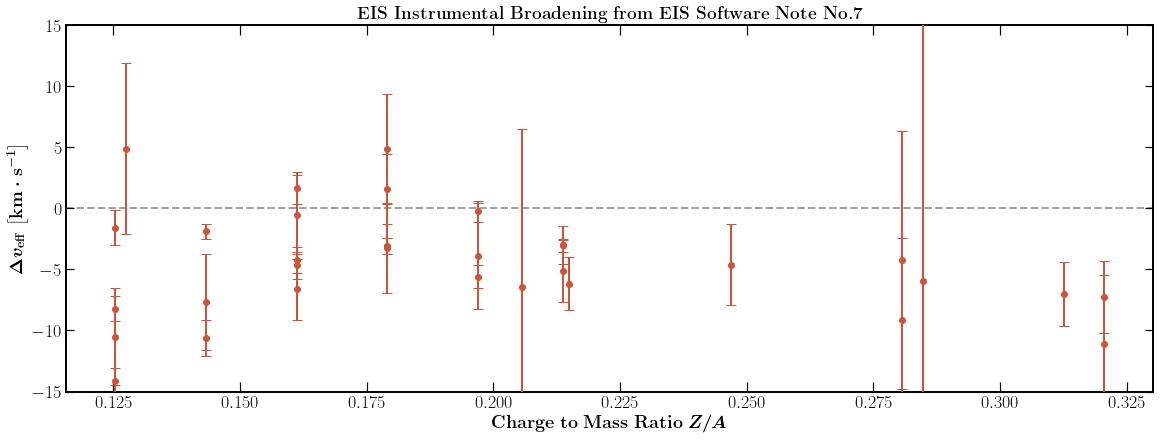

In [23]:
fig, ax = plt.subplots(figsize=(16,6),constrained_layout=True)

df_plot = df
eis_veff = df_plot["fwhm_true"]/df_plot["wvl_chianti"]*c/np.sqrt(4*np.log(2))

awsom_veff = df_plot["fwhm_awsom_true"]/df_plot["wvl_chianti"]*c/np.sqrt(4*np.log(2))

eis_veff_err = df_plot["fwhm_err"]*df_plot["fwhm_fit"] \
                /df_plot["fwhm_true"]/df_plot["wvl_chianti"]*c/np.sqrt(4*np.log(2))


ax.errorbar(df_plot["Z/A"],eis_veff-awsom_veff,eis_veff_err,color="#CC543A",ls="none",marker="o",
            markersize=6,capsize=5,lw=2,label="EIS",zorder=15)

ax.set_ylim((-15,15))
ax.axhline(0,color="#787878",lw=2,ls="--",alpha=0.7,zorder=0)
ax.tick_params(labelsize=18,direction="in",which="both",right=True,top=True)
ax.set_ylabel(r"$\boldsymbol{\Delta v_{\rm eff}\ \mathrm{\left[km\cdot s^{-1}\right]}}$",fontsize=18)
ax.set_xlabel(r"$\boldsymbol{\mathrm{Charge\ to\ Mass\ Ratio}\ Z/A}$",fontsize=18)
ax.set_title(r"\textbf{EIS Instrumental Broadening from EIS Software Note No.7}",fontsize=18)


Text(0.5, 1.0, '\\textbf{Modified EIS Instrumental Broadening}')

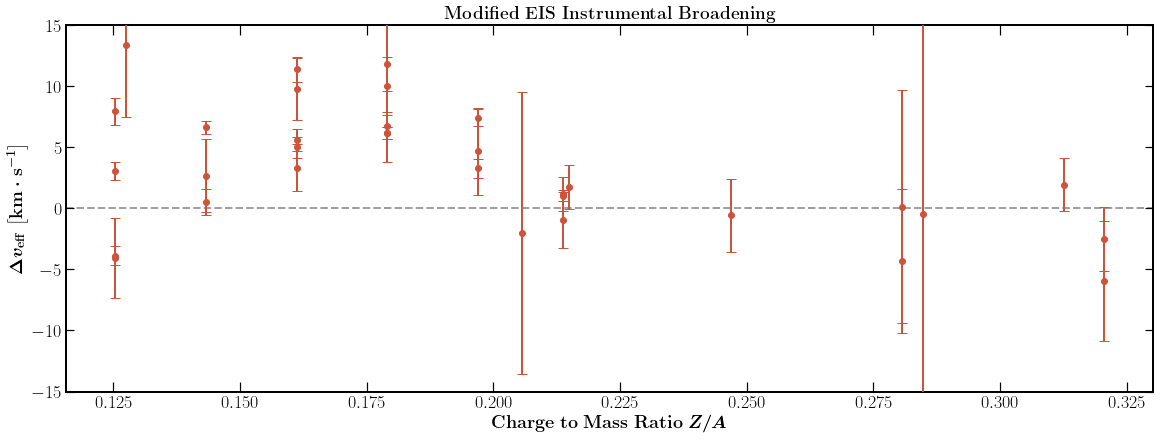

In [22]:
fig, ax = plt.subplots(figsize=(16,6),constrained_layout=True)

df_plot = df
eis_veff = df_plot["fwhm_true"]/df_plot["wvl_chianti"]*c/np.sqrt(4*np.log(2))

awsom_veff = df_plot["fwhm_awsom_true"]/df_plot["wvl_chianti"]*c/np.sqrt(4*np.log(2))

eis_veff_err = df_plot["fwhm_err"]*df_plot["fwhm_fit"] \
                /df_plot["fwhm_true"]/df_plot["wvl_chianti"]*c/np.sqrt(4*np.log(2))

eis_veff_cross = df_plot["fwhm_true_cross"]/df_plot["wvl_chianti"]*c/np.sqrt(4*np.log(2))
eis_veff_err_cross = df_plot["fwhm_err"]*df_plot["fwhm_fit"] \
                /df_plot["fwhm_true_cross"]/df_plot["wvl_chianti"]*c/np.sqrt(4*np.log(2))


ax.errorbar(df_plot["Z/A"],eis_veff_cross-awsom_veff,eis_veff_err_cross,color="#CC543A",ls="none",marker="o",
            markersize=6,capsize=5,lw=2,label="EIS",zorder=15)

ax.set_ylim((-15,15))
ax.axhline(0,color="#787878",lw=2,ls="--",alpha=0.7,zorder=0)
ax.tick_params(labelsize=18,direction="in",which="both",right=True,top=True)
ax.set_ylabel(r"$\boldsymbol{\Delta v_{\rm eff}\ \mathrm{\left[km\cdot s^{-1}\right]}}$",fontsize=18)
ax.set_xlabel(r"$\boldsymbol{\mathrm{Charge\ to\ Mass\ Ratio}\ Z/A}$",fontsize=18)
ax.set_title(r"\textbf{Modified EIS Instrumental Broadening}",fontsize=18)
